In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

In [2]:
#df = pd.read_csv('laptops.csv', encoding = "ISO-8859-1")
url = 'https://raw.githubusercontent.com/aibhishek/IFBD/master/laptops.csv'
s=requests.get(url).content
df=pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)

In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

#### Splitting CPU

In [4]:
df.Cpu = df.Cpu.replace({'Intel Atom x5-Z8350 1.44GHz': 'Intel Atom x5-Z8350 1.4GHz', 'Intel Celeron Dual Core N3060 1.60GHz': 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Atom Z8350 1.92GHz': 'Intel Atom Z8350 1.9GHz', 'Intel Core i5 7200U 2.50GHz': 'Intel Core i5 7200U 2.5GHz','Intel Core i5 7200U 2.70GHz':'Intel Core i5 7200U 2.7GHz','Intel Atom X5-Z8350 1.44GHz': 'Intel Atom X5-Z8350 1.4GHz', 'Intel Core i5 7200U 2.50GHz': 'Intel Core i5 7200U 2.5GHz','Intel Atom x5-Z8300 1.44GHz':'Intel Atom x5-Z8300 1.4GHz','Intel Core i7 6500U 2.50GHz':'Intel Core i7 6500U 2.5GHz'})

In [5]:
df['CPU Frequency'] = df.Cpu.str[-6:]
df['CPU Frequency'] = df['CPU Frequency'].str[0:3]
df['CPU Frequency'] = df['CPU Frequency'].replace({'U 2':'2.0','6 3':'3.0','0 3':'3.0','P 3':'3.0','0 2':'2.0'})
df['CPU Frequency'] = pd.to_numeric(df['CPU Frequency'], errors='coerce')

In [6]:
df['CPU Frequency'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.4 , 1.5 , 1.9 , 1.1 , 0.44, 1.3 , 2.6 , 3.6 , 3.2 ,
       1.  , 2.1 , 0.9 ])

In [7]:
df.Cpu = df.Cpu.str[0:13]

In [8]:
df.Cpu = df.Cpu.replace({'AMD A10-Serie':'AMD A10-Series','AMD A12-Serie':'AMD A12-Series','Samsung Corte':'Samsung Cortex'})

In [9]:
#df

In [10]:
#df["Memory Capacity in GB"].unique()

#### Converting Memory to numeric

In [11]:
df.Memory = df.Memory.replace({'128GB SSD +  2TB HDD':'2128GB Hybrid',
                               '256GB SSD +  256GB SSD':'500GB SSD',
                               '256GB SSD +  2TB HDD':'2256GB Hybrid',
                              '512GB SSD +  1TB HDD':'1512GB Hybrid',
                              '256GB SSD +  500GB HDD':'756GB Hybrid',
                              '128GB SSD +  2TB HDD':'2128GB Hybrid',
                              '512GB SSD +  512GB SSD':'1TB SSD',
                              '512GB SSD +  256GB SSD':'756GB SSD',
                              '512GB SSD +  2TB HDD':'2512GB Hybrid',
                              '64GB Flash Storage +  1TB HDD':'1064GB Hybrid',
                              '1TB HDD +  1TB HDD':'2000GB HDD',
                              '512GB SSD +  1.0TB Hybrid':'1512GB Hybrid',
                              '256GB SSD +  1.0TB Hybrid':'1256GB Hybrid',
                              '128GB SSD +  1TB HDD':'1128GB Hybrid',
                              '256GB SSD +  1TB HDD':'1256GB Hybrid',
                              '1TB SSD +  1TB HDD':'2000GB Hybrid'
                              
                              })

In [12]:
df.Memory = df.Memory.replace({'1TB HDD':'1000GB HDD','2TB HDD':'2000GB HDD','1.0TB Hybrid':'1000GB Hybrid','1TB SSD':'1000GB SSD','1.0TB HDD':'1000GB HDD'})

In [13]:
new = df.Memory.str.split(" ", n = 1, expand = True) 
df["Memory Capacity in GB"]= new[0]
df["Memory Type"]= new[1] 

In [14]:
# Dropping Memory column
df = df.drop('Memory',axis=1)
new = df["Memory Capacity in GB"].str.split("G", n = 1, expand = True) 
df["Memory Capacity in GB"]= new[0]
df["Memory Capacity in GB"] = pd.to_numeric(df["Memory Capacity in GB"])

In [15]:
#df["RAM (GB)"].unique()

#### Convertinh RAM to numeric

In [16]:
new = df["Ram"].str.split("G", n = 1, expand = True) 
df["RAM (GB)"]= new[0]
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"])
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"])
df = df.drop('Ram', axis=1)

### <p style = "color:red">Visualisations</p>

### Matplotlib

In [17]:
import matplotlib.pyplot as plt

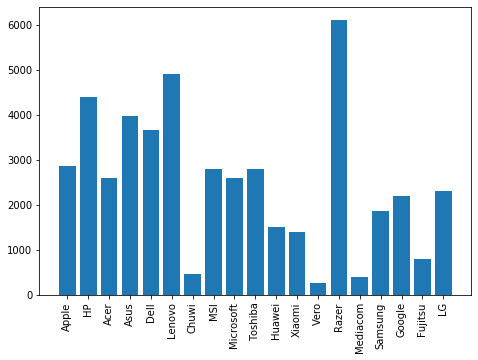

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Company,df.Price_euros)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [19]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Gpu', 'OpSys', 'Weight', 'Price_euros',
       'CPU Frequency', 'Memory Capacity in GB', 'Memory Type', 'RAM (GB)'],
      dtype='object')

In [20]:
abc = set()
for d in df.ScreenResolution:
    abc.add(d[-10:])

In [21]:
abc

{' 1920x1080',
 ' 1920x1200',
 ' 2160x1440',
 ' 2256x1504',
 ' 2304x1440',
 ' 2400x1600',
 ' 2560x1440',
 ' 2560x1600',
 ' 2736x1824',
 ' 2880x1800',
 ' 3200x1800',
 ' 3840x2160',
 '1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 'D 1366x768',
 'l 1366x768',
 'n 1366x768'}

#### Converting Screen resolution to numeric

In [22]:
sr = pd.DataFrame()
sr['Resolution'] = df.ScreenResolution.str[-10:]

In [23]:
sr['Resolution'] = sr['Resolution'].replace({'D 1366x768':'1366x768','l 1366x768':'1366x768','n 1366x768':'1366x768'})

In [24]:
new = sr['Resolution'].str.split("x", n = 1, expand = True) 
sr["res1"]= new[0]
sr["res2"]= new[1]

In [25]:
sr.res1 = pd.to_numeric(sr.res1)
sr.res2 = pd.to_numeric(sr.res2)

In [26]:
sr['res_pixels'] = sr.res1*sr.res2

In [27]:
df['Screen Resolution in Pixels'] = sr.res_pixels

In [28]:
df.shape

(1303, 16)

In [29]:
df = df.drop('ScreenResolution', axis=1)

In [30]:
df

,Unnamed: 0,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Weight,Price_euros,CPU Frequency,Memory Capacity in GB,Memory Type,RAM (GB),Screen Resolution in Pixels
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,128,SSD,8,4096000
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,128,Flash Storage,8,1296000
2,3,HP,250 G6,Notebook,15.6,Intel Core i5,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,256,SSD,8,2073600
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,512,SSD,16,5184000
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,256,SSD,8,4096000
5,6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series,AMD Radeon R5,Windows 10,2.1kg,400.00,3.0,500,HDD,4,1049088
6,7,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2.2,256,Flash Storage,16,5184000
7,8,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,1.34kg,1158.70,1.8,256,Flash Storage,8,1296000
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel Core i7,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,1.8,512,SSD,16,2073600
9,10,Acer,Swift 3,Ultrabook,14.0,Intel Core i5,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,1.6,256,SSD,8,2073600


#### CPU Encoding

In [31]:
df.Cpu.unique() #22 len

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series', 'Intel Core i3',
       'Intel Core M ', 'Intel Atom x5', 'AMD E-Series ', 'AMD A6-Series',
       'Intel Celeron', 'AMD Ryzen 170', 'Intel Pentium', 'AMD FX 9830P ',
       'Intel Xeon E3', 'AMD A10-Series', 'AMD A8-Series',
       'AMD A12-Series', 'AMD Ryzen 160', 'Intel Atom Z8',
       'AMD A4-Series', 'AMD FX 8800P ', 'Intel Atom X5',
       'Samsung Cortex'], dtype=object)

In [32]:
df.Cpu = df.Cpu.replace({
    'Intel Xeon E3': 22,
'Intel Core i7':20,
'Intel Core i5':18,
'AMD FX 9830P ':18,
'AMD FX 8800P ':18,
'Intel Core i3':15,
'AMD A10-Series':15,
    'AMD A8-Series':15,'AMD A12-Series':15, 'AMD Ryzen 160':15, 'Intel Atom Z8':15,
'Intel Core M ':10, 'Intel Atom x5':10, 'AMD E-Series ':10, 'AMD A6-Series':10,'Intel Celeron':10,
'Intel Pentium':8,'AMD A9-Series':8,
'Intel Atom X5':7,'Samsung Cortex':7
})

In [33]:
df.Cpu = df.Cpu.replace({'AMD Ryzen 170':15,'AMD A4-Series':10})

#### TypeName Encoding

In [34]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [35]:
df.TypeName = df.TypeName.replace({'Workstation':5,
                                  'Gaming':4,
                                  'Notebook':3,
                                  'Ultrabook':3,
                                  'Netbook':1,
                                  '2 in 1 Convertible':2})

#### Company Encoding

In [36]:
df.Company = df.Company.replace({
    'Apple':19, 'HP':15, 'Acer':15, 'Asus':16, 'Dell':16, 'Lenovo':15, 'Chuwi':7, 'MSI':19,
       'Microsoft':13, 'Toshiba':13, 'Huawei':9, 'Xiaomi':9, 'Vero':9, 'Razer':19,
       'Mediacom':9, 'Samsung':13, 'Google':13, 'Fujitsu':11, 'LG':13
})

In [37]:
df.Company.unique() #19 len

array([19, 15, 16,  7, 13,  9, 11], dtype=int64)

#### OpSys Encoding

In [38]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [39]:
df.OpSys = df.OpSys.replace({'macOS':9,
                            'Mac OS X':9,
                             'Windows 10':9,
                             'Windows 10 S':9,
                            'Linux':8,
                             'Android':5,
                             'Chrome OS':4,
                             'Windows 7':4,
                             'No OS':0
                            })

In [40]:
new = df['Weight'].str.split("k", n = 1, expand = True) 
df["Weight"]= new[0]

#### Memory Type Encoding

In [41]:
df['Memory Type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [42]:
df['Memory Type'] = df['Memory Type'].replace({
    'SSD':10,
    'Flash Storage': 7,
    'Hybrid': 7,
    'HDD':3
})

#### GPU encoding

In [43]:
df['Gpu'] = df['Gpu'].astype('category').cat.codes 

### Correlation Matrix

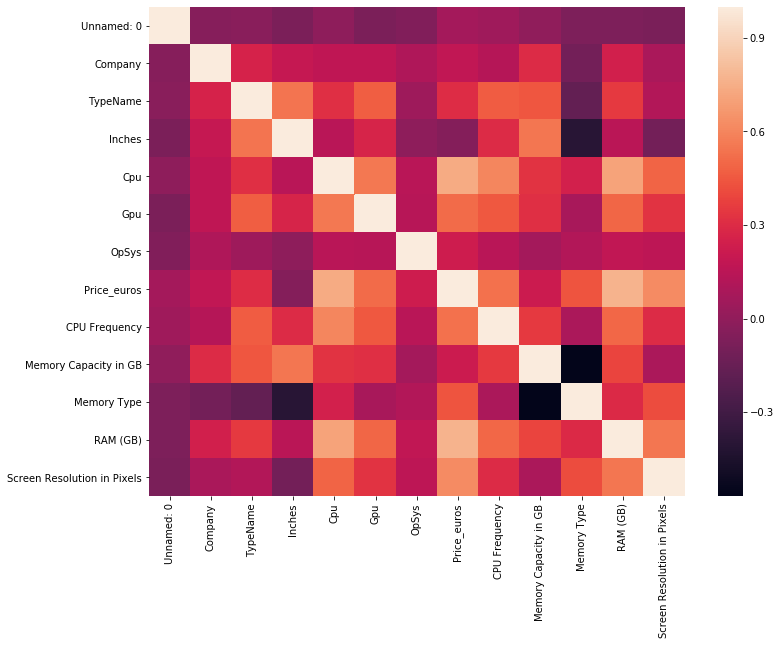

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12,9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);

In [45]:
for col in corrmat.columns:
    for row in corrmat.columns:
        count = 0
        if (corrmat[col][row]>0.8 or corrmat[col][row]<-0.8) and not corrmat[col][row] == 1:
            print(row,'+',col,'--> ',corrmat[col][row])
    print('Count of total columns showing multicolinearity: ',count)

Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0
Count of total columns showing multicolinearity:  0


In [46]:
df = df.drop('Unnamed: 0', axis=1)

In [47]:
cols = list(df.columns)

In [48]:
cols.remove('Product')
cols.remove('Price_euros')

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for col in cols:
    df[col] = min_max_scaler.fit_transform(df[col].values.reshape(-1, 1))


In [50]:
df

,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Weight,Price_euros,CPU Frequency,Memory Capacity in GB,Memory Type,RAM (GB),Screen Resolution in Pixels
0,1.000000,MacBook Pro,0.50,0.385542,0.733333,0.532110,1.000000,0.169576,1339.69,0.588608,0.047923,1.000000,0.096774,0.420536
1,1.000000,Macbook Air,0.50,0.385542,0.733333,0.467890,1.000000,0.162095,898.94,0.430380,0.047923,0.571429,0.096774,0.034079
2,0.666667,250 G6,0.50,0.662651,0.733333,0.486239,0.000000,0.291771,575.00,0.651899,0.099042,1.000000,0.096774,0.141403
3,1.000000,MacBook Pro,0.50,0.638554,0.866667,0.082569,1.000000,0.284289,2537.45,0.715190,0.201278,1.000000,0.225806,0.570702
4,1.000000,MacBook Pro,0.50,0.385542,0.733333,0.541284,1.000000,0.169576,1803.60,0.841772,0.099042,1.000000,0.096774,0.420536
5,0.666667,Aspire 3,0.50,0.662651,0.066667,0.155963,1.000000,0.351621,400.00,0.810127,0.196486,0.000000,0.032258,0.000000
6,1.000000,MacBook Pro,0.50,0.638554,0.866667,0.550459,1.000000,0.336658,2139.97,0.556962,0.099042,0.571429,0.225806,0.570702
7,1.000000,Macbook Air,0.50,0.385542,0.733333,0.467890,1.000000,0.162095,1158.70,0.430380,0.099042,0.571429,0.096774,0.034079
8,0.750000,ZenBook UX430UN,0.50,0.469880,0.866667,0.899083,1.000000,0.152120,1495.00,0.430380,0.201278,1.000000,0.225806,0.141403
9,0.666667,Swift 3,0.50,0.469880,0.733333,0.559633,1.000000,0.226933,770.00,0.367089,0.099042,1.000000,0.096774,0.141403


### Creating test and train data

In [51]:
product = df.Product
df = df.drop('Product',axis=1)
y = df.Price_euros
x = df.drop('Price_euros',axis=1)

In [52]:
print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=101)

print('x_train dimentions: ',x_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',x_test.shape)
print('y_test  dimentions: ',y_test.shape)

Target dimentions:  (1303,)
Independent data dimentions:  (1303, 12)
x_train dimentions:  (912, 12)
y_train  dimentions:  (912,)
x_test dimentions:  (391, 12)
y_test  dimentions:  (391,)


### Machine Learning

In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
regressors = [SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False),
             Lasso(alpha=0.1),
             svm.SVR(),
             GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')]

#### Training and testing

In [55]:
MAE = []
MSE = []
for reg in regressors:
    reg.fit(x_train, y_train)
    name = reg.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = reg.predict(x_test)
    
    acc = mean_absolute_error(y_test, train_predictions)
    print("MAE:",acc)
    MAE.append(acc)
    
   
    ll = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("MSE:",ll)
    MSE.append(ll)
    
print("="*30)

SGDRegressor
****Results****
MAE: 291.5773043815754
MSE: 392.0558918043004
Lasso
****Results****
MAE: 265.7750288612929
MSE: 371.89895267713956
SVR
****Results****
MAE: 510.44432241695307
MSE: 687.5860527452508
GradientBoostingRegressor
****Results****
MAE: 232.72088586738022
MSE: 320.075063503719


C:\Users\maila\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
pred_value = regressors[3].predict(x)
true_value = y
pred_table = pd.DataFrame(list(zip(product,pred_value,true_value)),columns=['Product','Predicted Price','True Price'])

In [57]:
print('pred_value',type(pred_value))
print('true_value',type(true_value))
print('product',type(product))

pred_value <class 'numpy.ndarray'>
true_value <class 'pandas.core.series.Series'>
product <class 'pandas.core.series.Series'>


In [58]:
pred_table

,Product,Predicted Price,True Price
0,MacBook Pro,1634.764269,1339.69
1,Macbook Air,1111.997956,898.94
2,250 G6,1004.397884,575.00
3,MacBook Pro,2051.242304,2537.45
4,MacBook Pro,1838.066691,1803.60
5,Aspire 3,588.500526,400.00
6,MacBook Pro,2014.579717,2139.97
7,Macbook Air,1163.290774,1158.70
8,ZenBook UX430UN,1720.851216,1495.00
9,Swift 3,1094.479441,770.00


In [59]:
pred_table['Percent Error'] = (abs(pred_table['Predicted Price']-pred_table['True Price'])/pred_table['True Price'])*100

In [60]:
pred_table['Percent Accuracy'] =100- pred_table['Percent Error'] 

### Deep Learning

In [61]:
import pandas as pd
from sklearn import datasets
import tensorflow as tf
import itertools

In [62]:
#tf.train.update_checkpoint_state()

In [63]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'CPU Frequency', 'Memory Capacity in GB', 'Memory Type',
       'RAM (GB)', 'Screen Resolution in Pixels'],
      dtype='object')

In [64]:
df = df.rename(columns={'CPU Frequency':'CPUFrequency','Memory Capacity in GB':'MemoryCapacityinGB','Memory Type':'MemoryType','RAM (GB)':'RAMinGB','Screen Resolution in Pixels':'ScreenResolutioninPixels','Price_euros':'PriceEuros'})

In [65]:
train = df[0:900]
test = df[900:1302]

In [66]:
columns = df.columns

In [67]:
columns = list(columns)

In [68]:
columns

['Company',
 'TypeName',
 'Inches',
 'Cpu',
 'Gpu',
 'OpSys',
 'Weight',
 'PriceEuros',
 'CPUFrequency',
 'MemoryCapacityinGB',
 'MemoryType',
 'RAMinGB',
 'ScreenResolutioninPixels']

In [69]:
columns.remove('PriceEuros')

In [70]:
LABEL = 'PriceEuros'

In [71]:
cols_tf = [tf.feature_column.numeric_column(k) for k in columns]

In [72]:
estimator = tf.estimator.LinearRegressor(    
        feature_columns=cols_tf,   
        model_dir="train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):    
         return  tf.compat.v1.estimator.inputs.pandas_input_fn(       
         x=pd.DataFrame({k: data_set[k].values for k in columns}),       
         y = pd.Series(data_set[LABEL].values),       
         batch_size=n_batch,          
         num_epochs=num_epochs,       
         shuffle=shuffle)

In [74]:
#from tensorflow_core.estimator import inputs
estimator.train(input_fn=get_input_fn(train,                                       
                                           num_epochs=None,                                      
                                           n_batch = 128,                                      
                                           shuffle=False),                                      
                                           steps=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Ins

In [75]:
ev = estimator.evaluate(    
          input_fn=get_input_fn(test,                          
          num_epochs=1,                          
          n_batch = 128,                          
          shuffle=False))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-11T16:18:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.54504s
INFO:tensorflow:Finished evaluation at 2020-05-11-16:18:25
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1596033.0, global_step = 

In [76]:
train.shape

(900, 13)

In [77]:
predict_set = test.drop('PriceEuros',axis=1)

In [78]:
y = estimator.predict(    
         input_fn=get_input_fn(test,                          
         num_epochs=1,                          
         n_batch = 128,                          
         shuffle=False))

In [79]:
predictions = list(p["predictions"] for p in itertools.islice(y, 900))
print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Predictions: [array([86.28224], dtype=float32), array([113.761986], dtype=float32), array([80.37512], dtype=float32), array([81.88358], dtype=float32), array([90.77341], dtype=float32), array([90.074356], dtype=float32), array([80.44404], dtype=float32), array([64.5427], dtype=float32), array([93.77549], dtype=float32), array([85.85608], dtype=float32), array([88.29084], dtype=float32), array([80.41404], dtype=float32), array([94.411385], dtype=float32), array([93.983986], dtype=float32), array([78.7401], dtype=float32), array([83.202774], dtype=float32), array([84.759605], dtype=float32), array([107.96689], dtype=float32), array([101.49887], dtype=float32), array([98.8771], dtype=float32), array([76.736435], dtype=float32), array([88.028114], dtype=float32), array([93.02079], dtype=float32), array([94.110756], dtype=float32), array([82.59879], dtype=float32), array([75.63228], dtype=float32), array([85.58762], dtype=float32), array([89.176025], dtype=float32), array([80.20022], dtype=

In [80]:
predictions

[array([86.28224], dtype=float32),
 array([113.761986], dtype=float32),
 array([80.37512], dtype=float32),
 array([81.88358], dtype=float32),
 array([90.77341], dtype=float32),
 array([90.074356], dtype=float32),
 array([80.44404], dtype=float32),
 array([64.5427], dtype=float32),
 array([93.77549], dtype=float32),
 array([85.85608], dtype=float32),
 array([88.29084], dtype=float32),
 array([80.41404], dtype=float32),
 array([94.411385], dtype=float32),
 array([93.983986], dtype=float32),
 array([78.7401], dtype=float32),
 array([83.202774], dtype=float32),
 array([84.759605], dtype=float32),
 array([107.96689], dtype=float32),
 array([101.49887], dtype=float32),
 array([98.8771], dtype=float32),
 array([76.736435], dtype=float32),
 array([88.028114], dtype=float32),
 array([93.02079], dtype=float32),
 array([94.110756], dtype=float32),
 array([82.59879], dtype=float32),
 array([75.63228], dtype=float32),
 array([85.58762], dtype=float32),
 array([89.176025], dtype=float32),
 array([80

In [83]:
pred_table_dl = pd.DataFrame(list(zip(test.PriceEuros,predictions)),columns=['True Price','Predicted Price'])

In [89]:
#pred_table_dl

In [85]:
pred_table_dl['Percent Error'] = (abs(pred_table['Predicted Price']-pred_table['True Price'])/pred_table['True Price'])*100

In [87]:
np.mean(pred_table_dl['Percent Error'])

25.91203591054297

In [88]:
np.mean(pred_table['Percent Error'])

24.484892863616746